# AllLife Credit Card Customer Segmentation Project

## Alfredo Coviello




In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn.cluster

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel("Credit Card Customer Data.xlsx")
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [153]:
data.shape

(660, 7)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [155]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [156]:
# Scaling is key for clustering for measuring distances, and this dataset clearly shows it
# (i.e. range of credit limit as compared to credit cards, visits and calls)

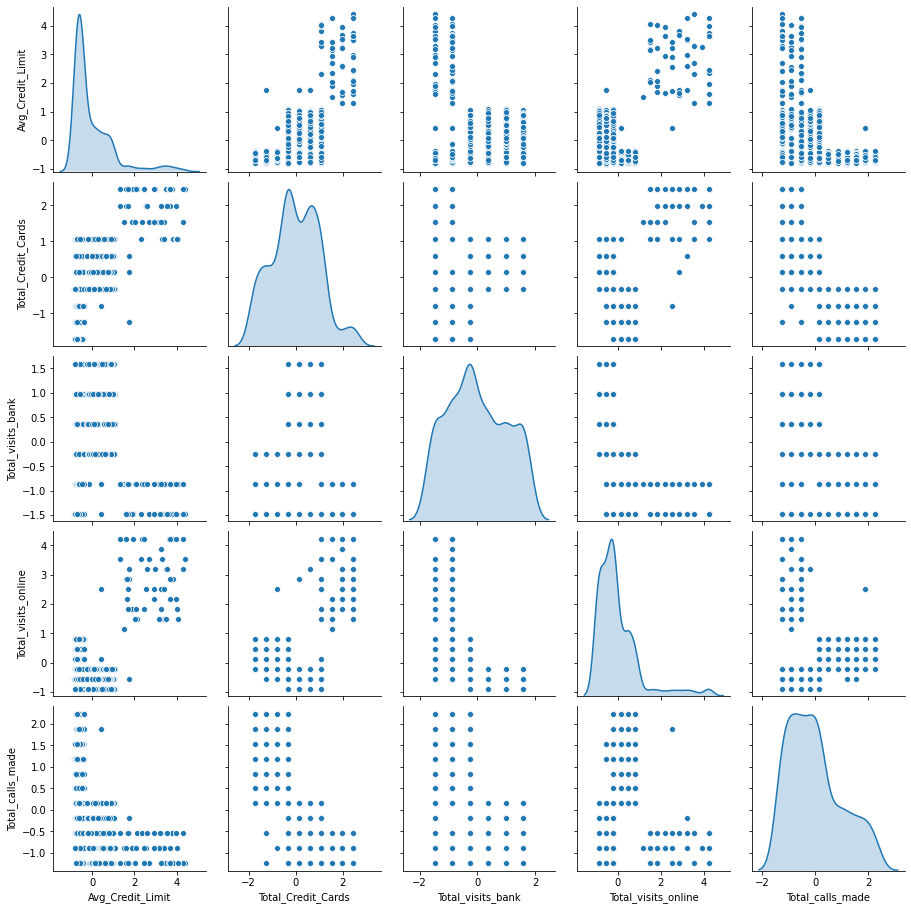

In [157]:
relevant_data=data.iloc[:,2:]
data_scaled=relevant.apply(zscore)
sns.pairplot(data_scaled,diag_kind='kde')

## Observations:

#### Diagonal kde's: no clear multigaussian variables - maybe avg_credit_limit, total_visits_bank and total_visits_online.

### Positive correlation pairs:
#### avg_credit_limit with: total_credit_cards, total_visits_online
#### total_credit_cards with: total_visits_online
### Negative correlation pairs:
#### avg_credit_limit with: total_visits_banks, total_calls_made
#### total_credit_cards with: total_calls_made
#### total_visits_bank with with: total_visits_online
#### total_visits_online with: total_calls_made

In [158]:
data_scaled.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


************** Metric: braycurtis ************


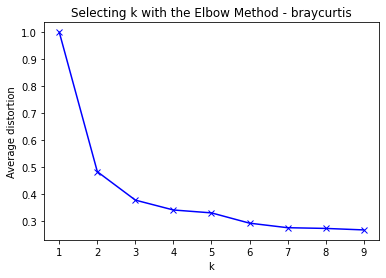

************** Metric: canberra ************


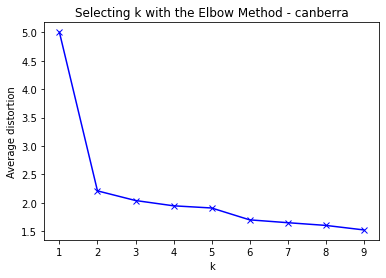

************** Metric: chebyshev ************


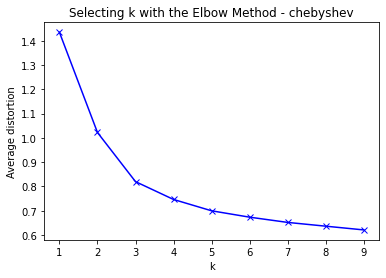

************** Metric: cityblock ************


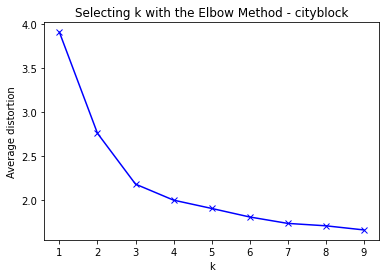

************** Metric: correlation ************


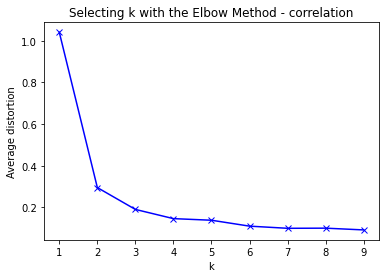

************** Metric: cosine ************


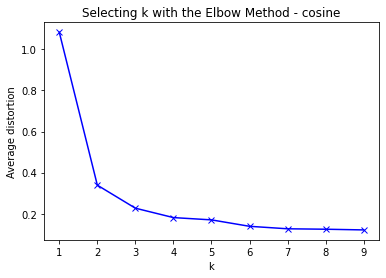

************** Metric: dice ************


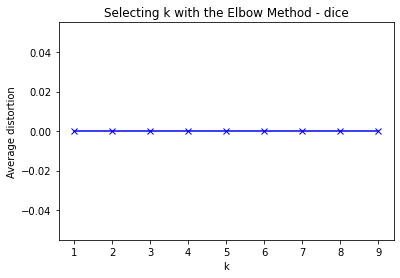

************** Metric: euclidean ************


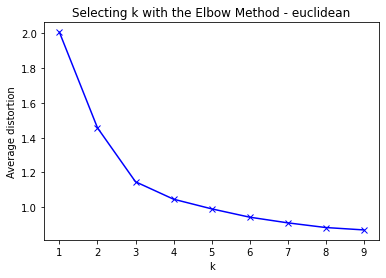

************** Metric: hamming ************


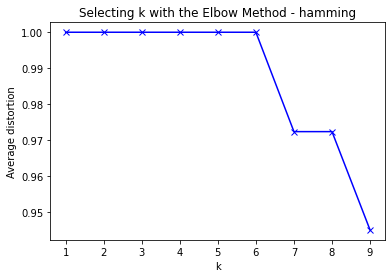

************** Metric: jaccard ************


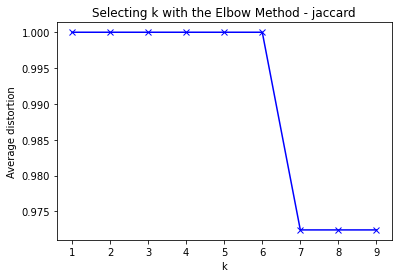

************** Metric: jensenshannon ************


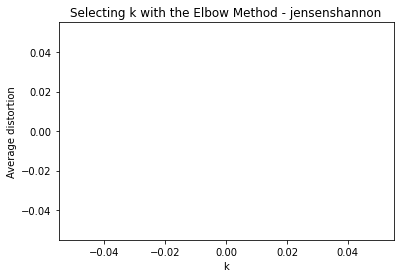

************** Metric: kulsinski ************


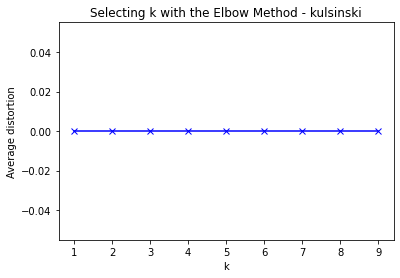

************** Metric: mahalanobis ************


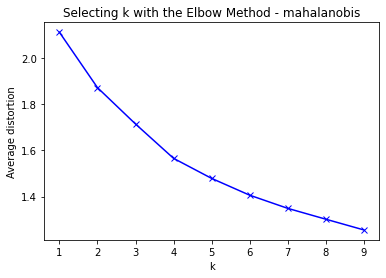

************** Metric: matching ************


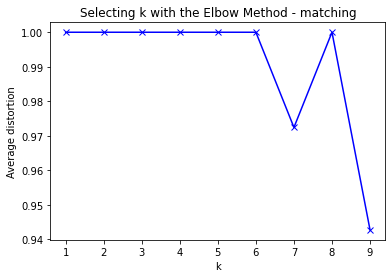

************** Metric: rogerstanimoto ************


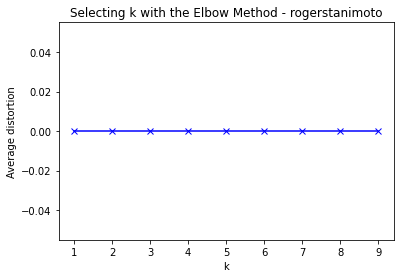

************** Metric: russellrao ************


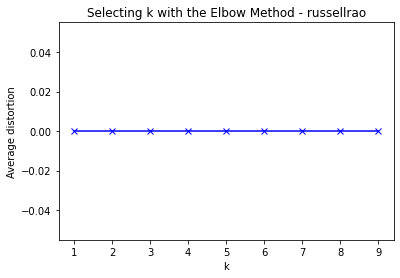

************** Metric: seuclidean ************


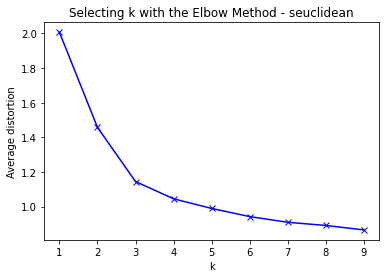

************** Metric: sokalmichener ************


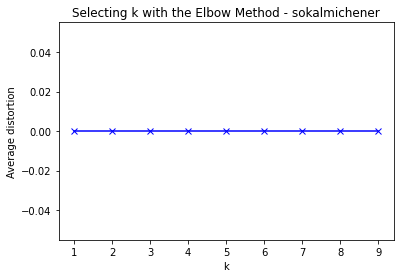

************** Metric: sokalsneath ************


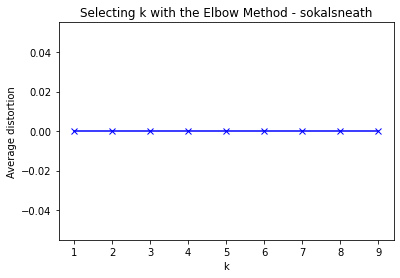

************** Metric: sqeuclidean ************


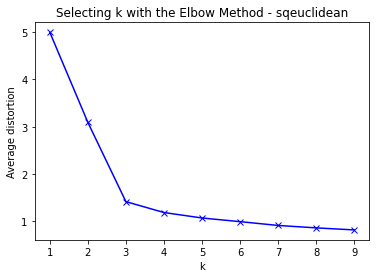

************** Metric: yule ************


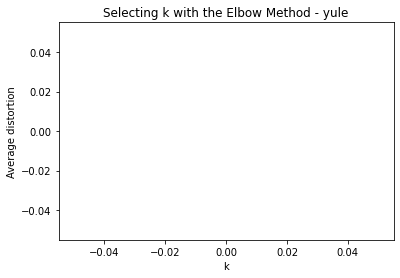

In [159]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
# 'minkowski', 'wminkowski' - require setting a weight param, TBD
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
    'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon',
    'kulsinski', 'mahalanobis', 'matching',  'rogerstanimoto',
    'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
     'yule']

n=0
for metric in metrics:
    print(f"************** Metric: {metric} ************")
    meanDistortions=[]
    for k in clusters:
        model=KMeans(n_clusters=k)
        a = model.fit(data_scaled)
        #print(a)
        #print(model)
        prediction=model.predict(data_scaled)
        meanDistortions.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, metric), axis=1)) / data_scaled.shape[0])
    plt.plot(clusters, meanDistortions, 'bx-')
    plt.ylabel('Average distortion')
    plt.xlabel('k')
    plt.title(f'Selecting k with the Elbow Method - {metric}')
    plt.plot()
    plt.show()
    n=n+1


#### Observations Elbow Method: different distances show ideal number of clusters is between 2 and 3

In [160]:
results = pd.DataFrame(columns={'clustering', 'clusters', 'method', 'cophenet_index', 'silhouette'})

# KNN for 2 and 3 clusters


# 2 Clusters

# K = 2
final_model=KMeans(2)
final_model.fit(data_scaled)
prediction=final_model.predict(data_scaled)

data["GROUP"] = prediction
data_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
print(data.head())

sil = silhouette_score(data_scaled, data_scaled['GROUP'])

results = results.append( { 'clustering': 'knn', 'clusters': 2, 'method': 'na',
                           'cophenet_index': np.nan, 'silhouette': sil }, ignore_index=True)

sil


Groups Assigned : 

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  GROUP  
0                  1                    1                 0      0  
1                  0                   10                 9      1  
2                  1                    3                 4      0  
3                  1                    1                 4      0  
4                  0                   12                 3      0  


0.44480554353718277

In [161]:
dataClust= data.groupby(['GROUP'])
dataClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,439.747706,55090.896789,46082.568807,5.885321,3.158257,2.119266,1.894495
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x143d6f090>,
      dtype=object)

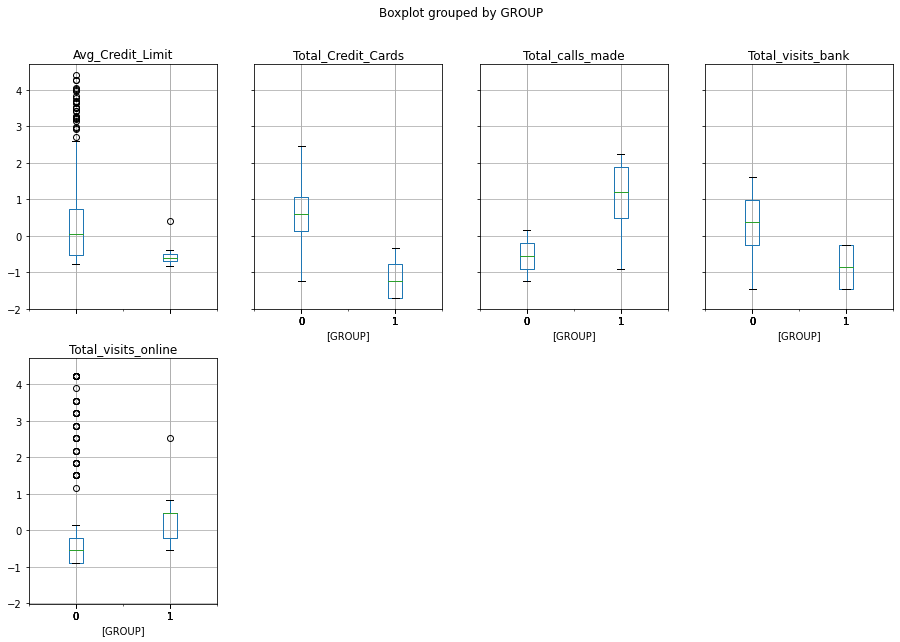

In [162]:
data_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### KNN 2 Clusters observations:
#### It looks like all 5 variables don't have a lot of overlap, so they look like possible good clusters.

In [163]:
# 3 Clusters

# K = 3
final_model=KMeans(3)
final_model.fit(data_scaled)
prediction=final_model.predict(data_scaled)

data["GROUP"] = prediction
data_scaled["GROUP"] = prediction
print(data.head())

sil = silhouette_score(data_scaled, data_scaled['GROUP'])

results = results.append( { 'clustering': 'knn', 'clusters': 3, 'method': 'na',
                           'cophenet_index': np.nan, 'silhouette': sil }, ignore_index=True)




   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  GROUP  
0                  1                    1                 0      1  
1                  0                   10                 9      0  
2                  1                    3                 4      1  
3                  1                    1                 4      1  
4                  0                   12                 3      2  


In [164]:
dataClust= data.groupby(['GROUP'])
dataClust.mean()
results

,cophenet_index,clustering,silhouette,method,clusters
0,NaN,knn,0.444806,na,2
1,NaN,knn,0.539779,na,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x152d62250>,
      dtype=object)

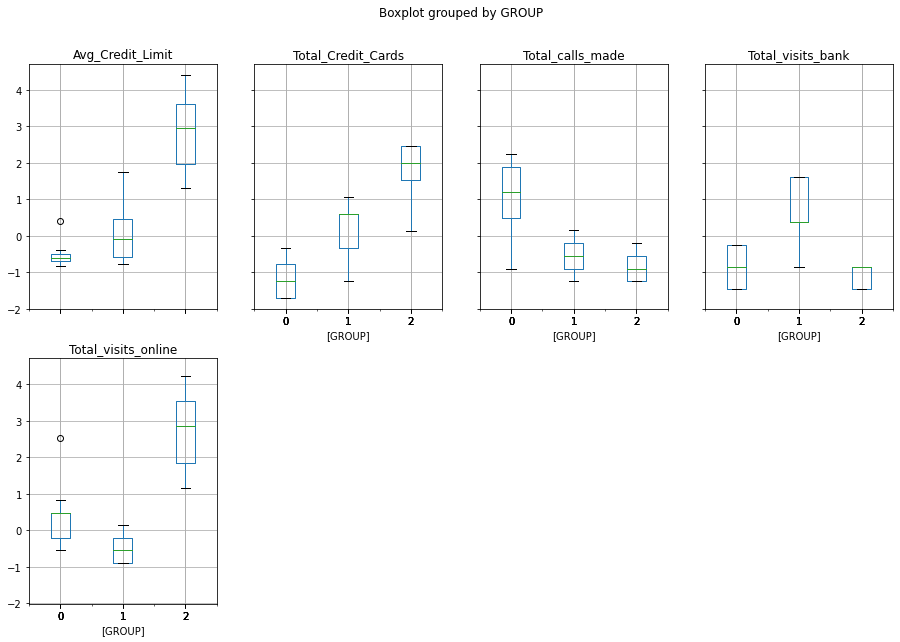

In [165]:
data_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### KNN 3 Clusters observations:
#### There seems to be more overlap as compared to 2 clusters on: avg_credit_limit, total_calls_made, total_visits_bank

## Hierarchical clustering

In [166]:
data_scaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


********* 2 clusters - Method: ward
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           46172.413793            5.887356           3.160920   
1           12151.111111            2.422222           0.937778   

        Total_visits_online  Total_calls_made  
labels                                         
0                  2.119540          1.889655  
1                  3.546667          6.857778  
Method ward c:0.7610139440965116 Silhouette score: 0.44419000976493805


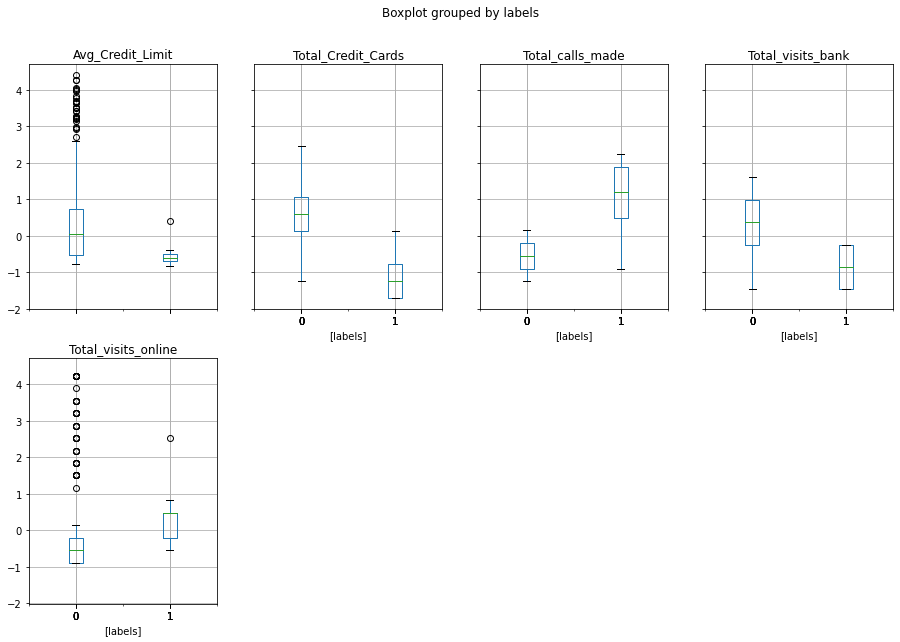

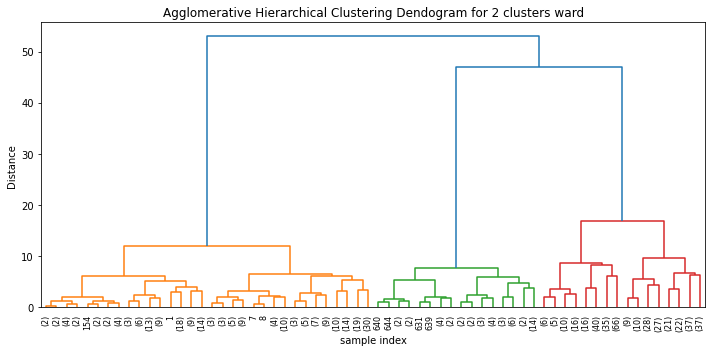

********* 2 clusters - Method: average
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           25847.540984             4.37541            2.55082   
1          141040.000000             8.74000            0.60000   

        Total_visits_online  Total_calls_made  
labels                                         
0                   1.92623          3.788525  
1                  10.90000          1.080000  
Method average c:0.9020408482999265 Silhouette score: 0.5778491354896657


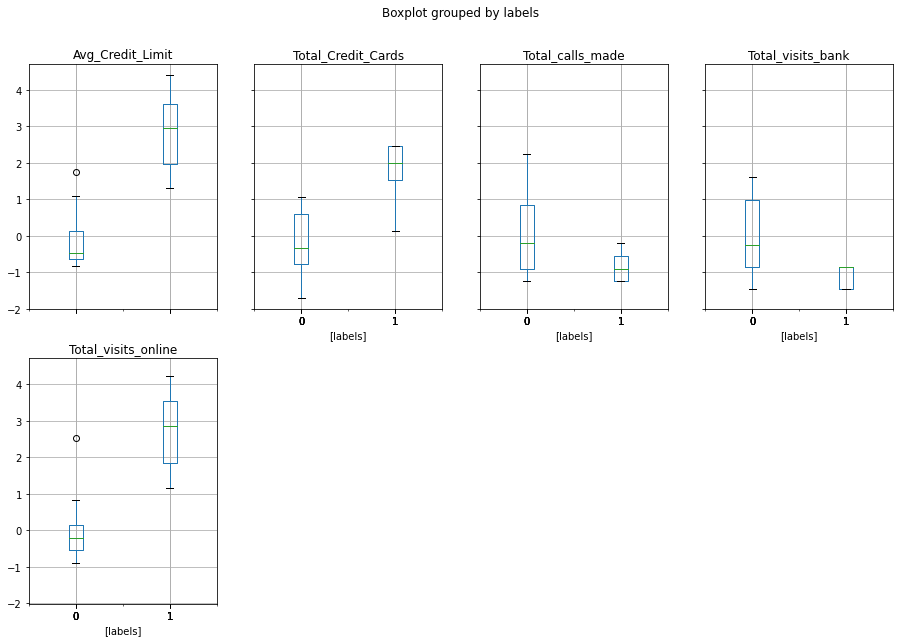

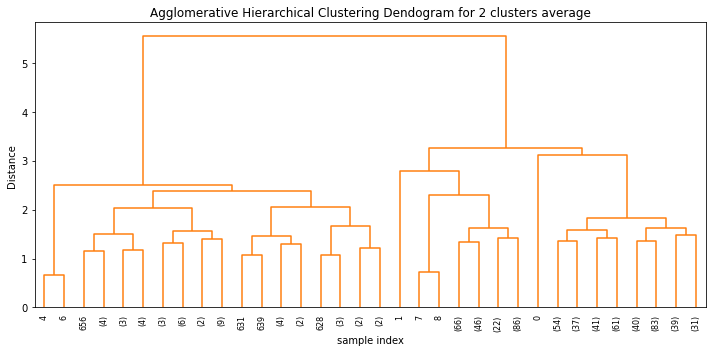

********* 2 clusters - Method: complete
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           25847.540984             4.37541            2.55082   
1          141040.000000             8.74000            0.60000   

        Total_visits_online  Total_calls_made  
labels                                         
0                   1.92623          3.788525  
1                  10.90000          1.080000  
Method complete c:0.8637064913676973 Silhouette score: 0.5778491354896657


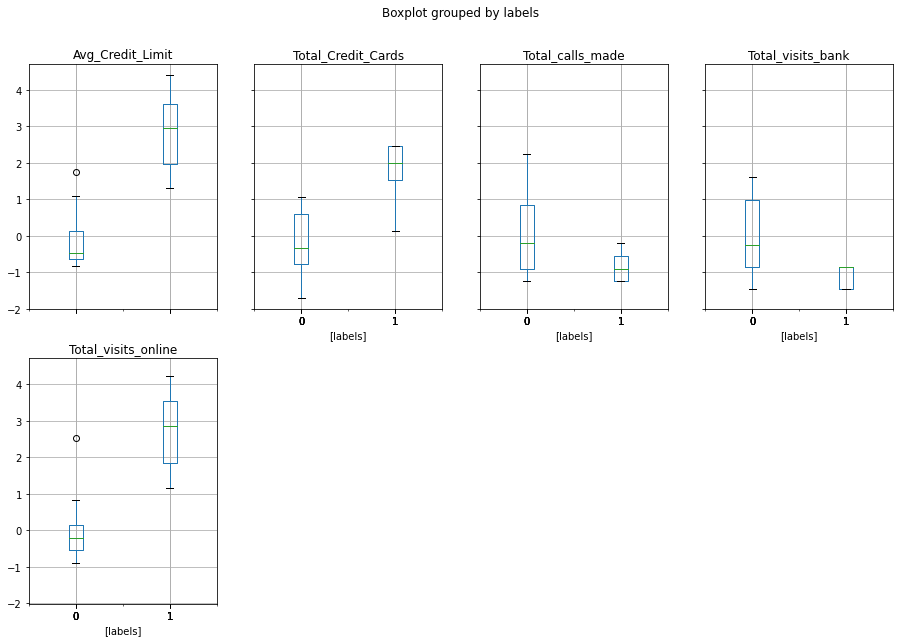

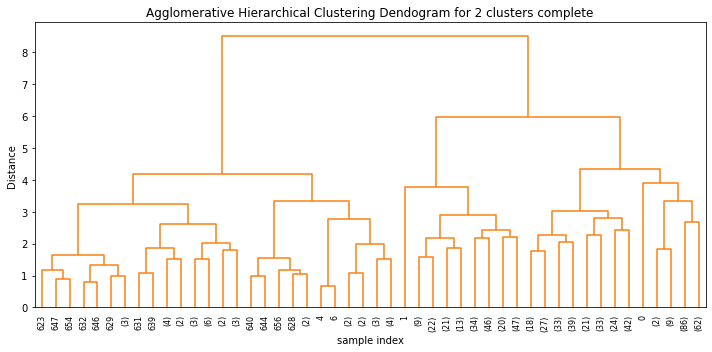

********* 2 clusters - Method: single
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           25847.540984             4.37541            2.55082   
1          141040.000000             8.74000            0.60000   

        Total_visits_online  Total_calls_made  
labels                                         
0                   1.92623          3.788525  
1                  10.90000          1.080000  
Method single c:0.7495170432379031 Silhouette score: 0.5778491354896657


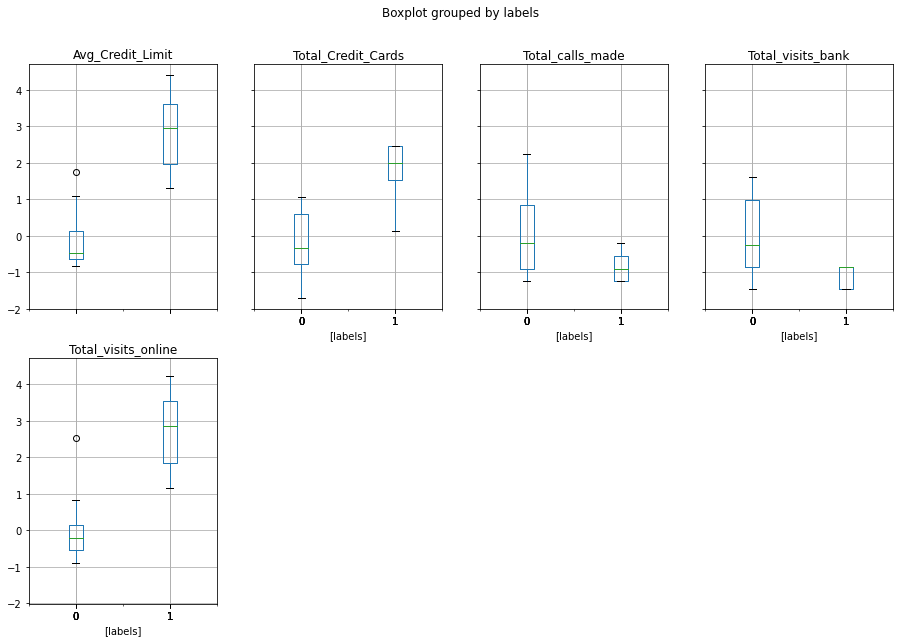

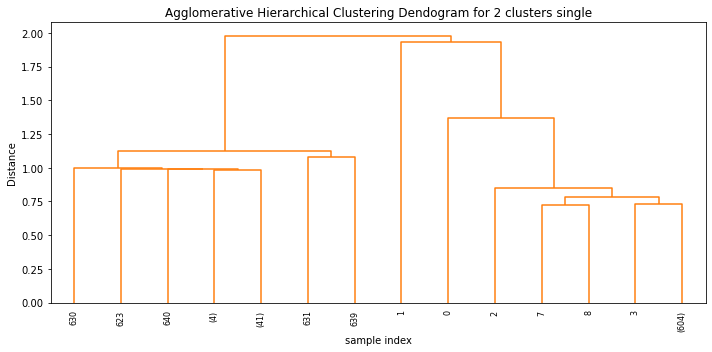

********* 3 clusters - Method: ward
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           33851.948052            5.516883           3.493506   
1           12151.111111            2.422222           0.937778   
2          141040.000000            8.740000           0.600000   

        Total_visits_online  Total_calls_made  
labels                                         
0                  0.979221          1.994805  
1                  3.546667          6.857778  
2                 10.900000          1.080000  
Method ward c:0.7733381987448996 Silhouette score: 0.5403161639178303


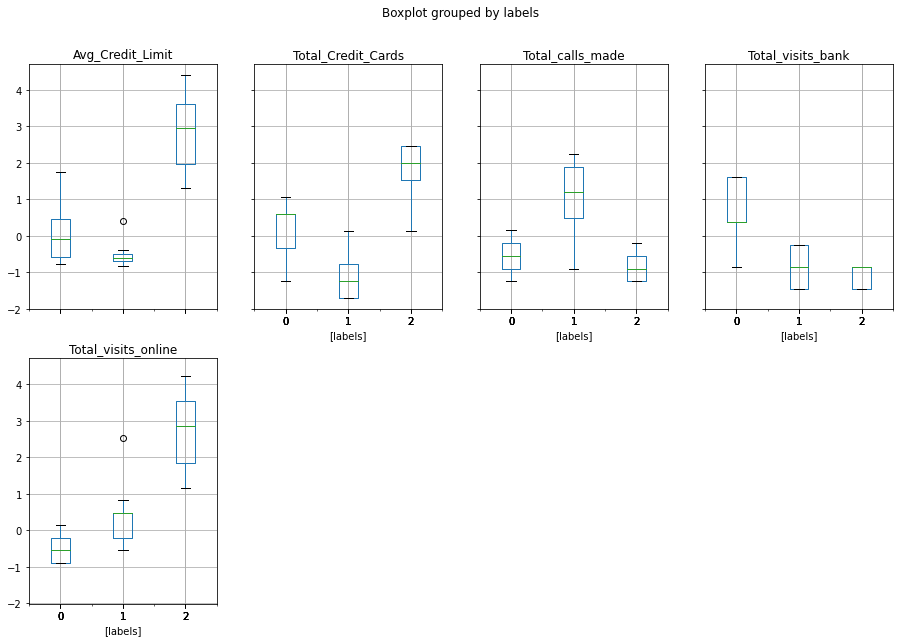

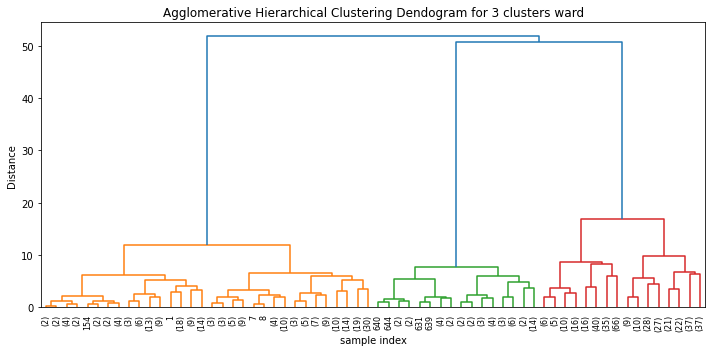

********* 3 clusters - Method: average
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           33851.948052            5.516883           3.493506   
1          141040.000000            8.740000           0.600000   
2           12151.111111            2.422222           0.937778   

        Total_visits_online  Total_calls_made  
labels                                         
0                  0.979221          1.994805  
1                 10.900000          1.080000  
2                  3.546667          6.857778  
Method average c:0.9246368770067261 Silhouette score: 0.5903021800538203


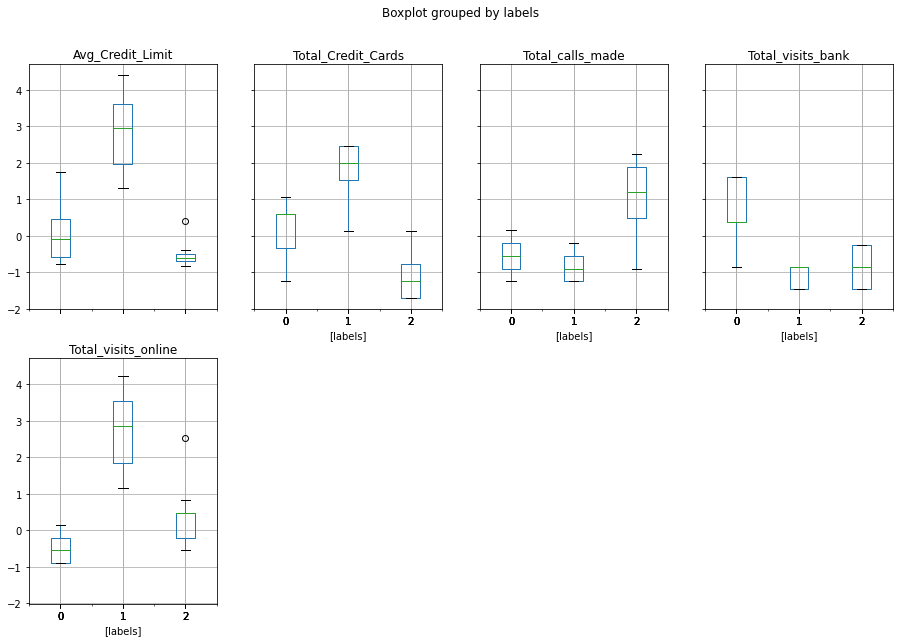

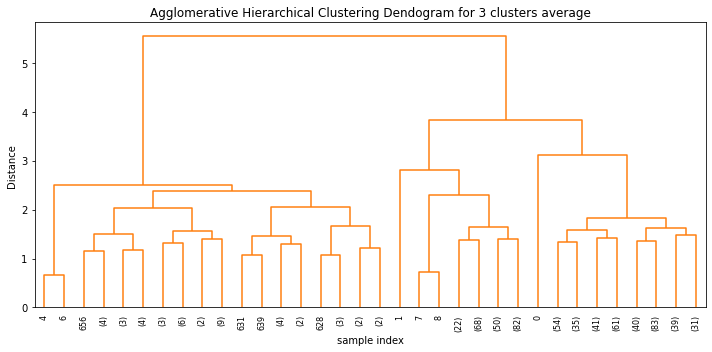

********* 3 clusters - Method: complete
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           12539.823009            2.420354           0.938053   
1          141040.000000            8.740000           0.600000   
2           33679.687500            5.526042           3.500000   

        Total_visits_online  Total_calls_made  
labels                                         
0                  3.535398          6.827434  
1                 10.900000          1.080000  
2                  0.979167          2.000000  
Method complete c:0.9048509343640897 Silhouette score: 0.589675733487971


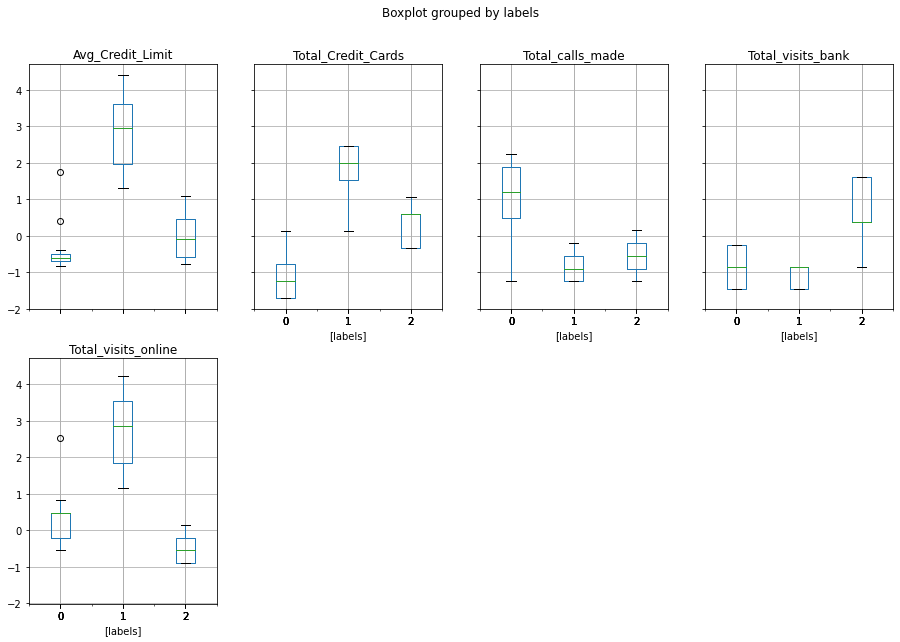

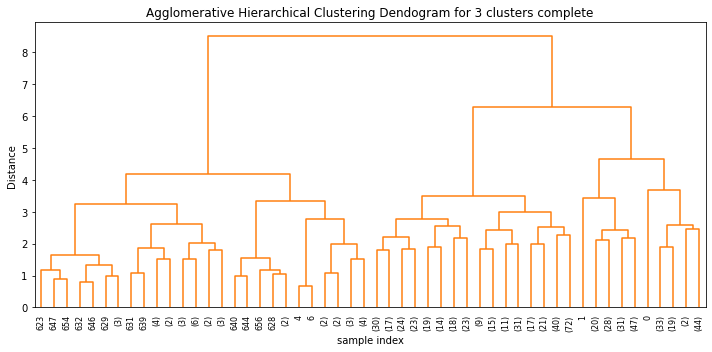

********* 3 clusters - Method: single
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           46048.387097            5.896313           3.165899   
1          100000.000000            2.000000           1.000000   
2           12151.111111            2.422222           0.937778   

        Total_visits_online  Total_calls_made  
labels                                         
0                  2.122120          1.894009  
1                  1.000000          0.000000  
2                  3.546667          6.857778  
Method single c:0.8117232633030952 Silhouette score: 0.41264373321936043


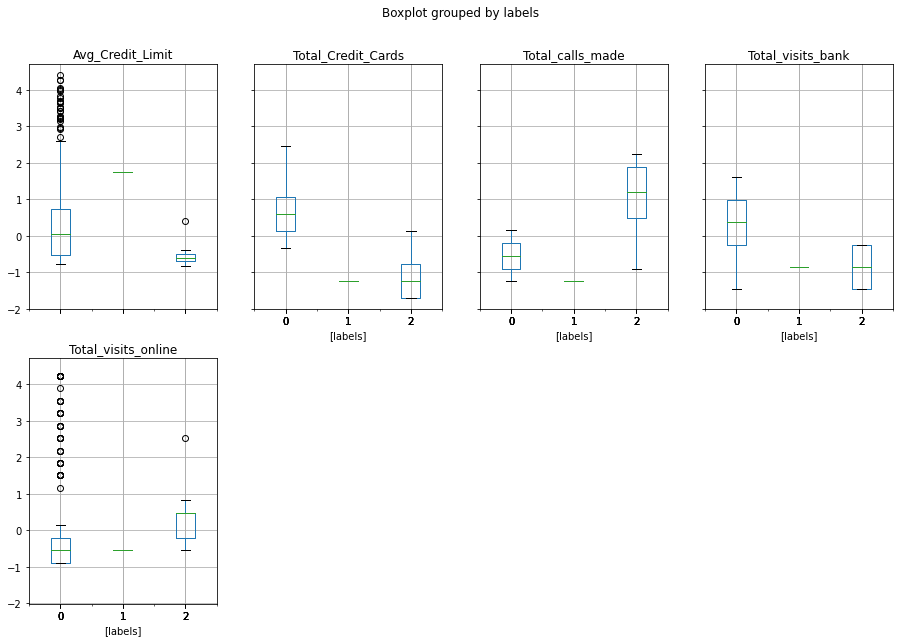

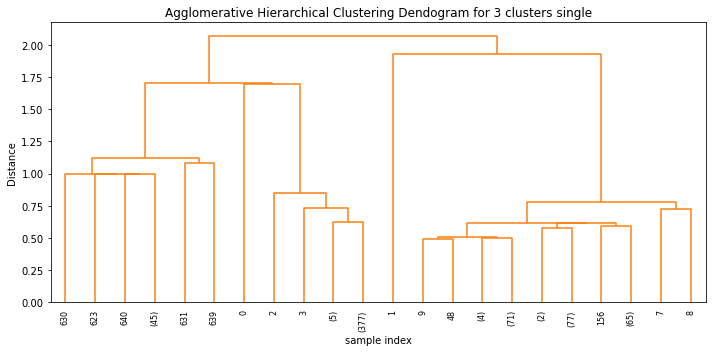

********* 4 clusters - Method: ward
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           12151.111111            2.422222           0.937778   
1           38298.429319            5.670157           2.523560   
2          141040.000000            8.740000           0.600000   
3           29474.226804            5.365979           4.448454   

        Total_visits_online  Total_calls_made  
labels                                         
0                  3.546667          6.857778  
1                  0.947644          2.099476  
2                 10.900000          1.080000  
3                  1.010309          1.891753  
Method ward c:0.7652344311575475 Silhouette score: 0.5081451650507066


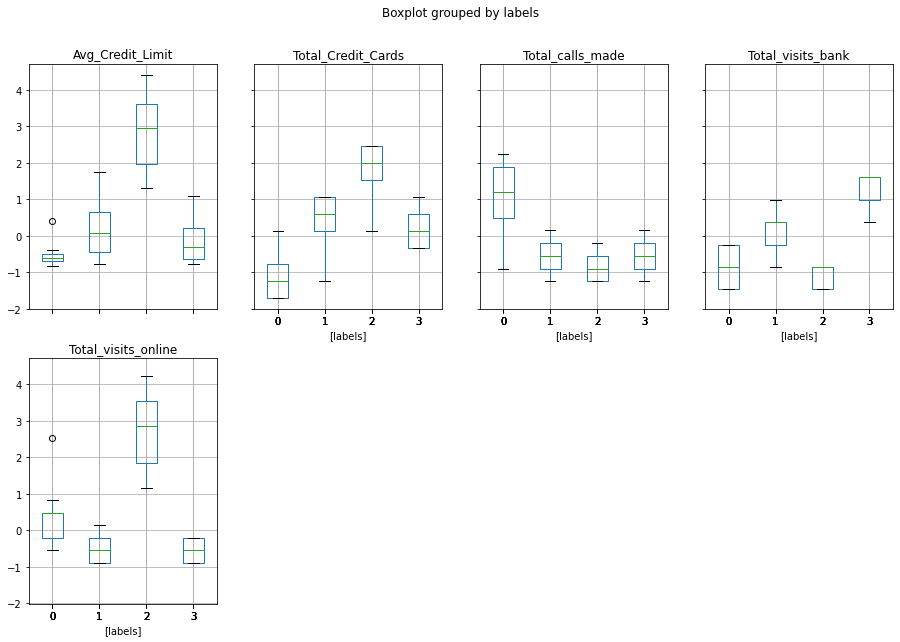

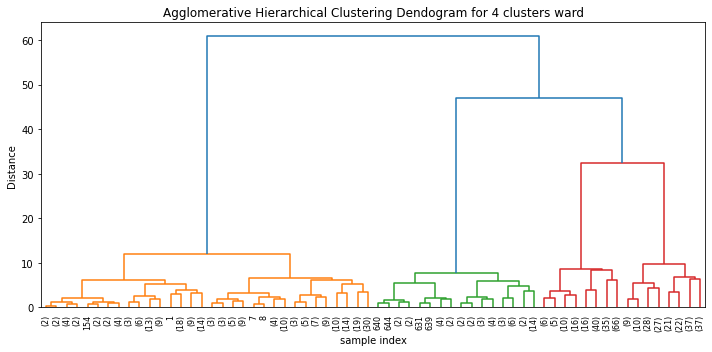

********* 4 clusters - Method: average
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           12151.111111            2.422222           0.937778   
1          141040.000000            8.740000           0.600000   
2           33679.687500            5.526042           3.500000   
3          100000.000000            2.000000           1.000000   

        Total_visits_online  Total_calls_made  
labels                                         
0                  3.546667          6.857778  
1                 10.900000          1.080000  
2                  0.979167          2.000000  
3                  1.000000          0.000000  
Method average c:0.9245886818924584 Silhouette score: 0.5374771097127151


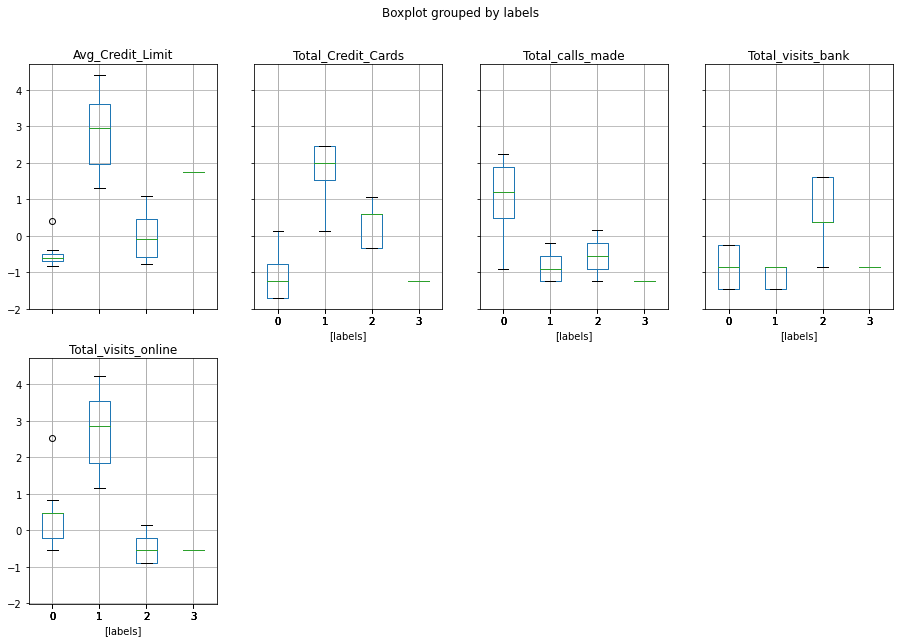

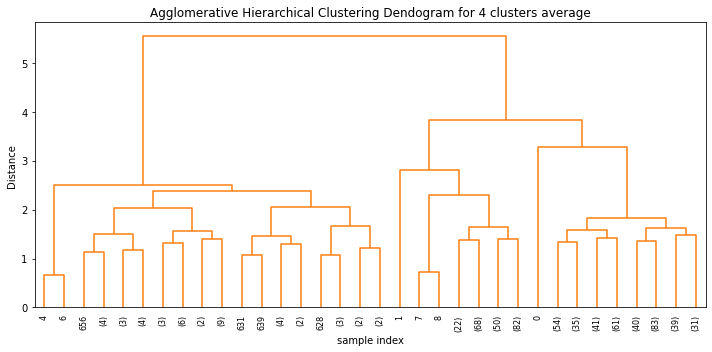

********* 4 clusters - Method: complete
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           12151.111111            2.422222           0.937778   
1          141040.000000            8.740000           0.600000   
2           33679.687500            5.526042           3.500000   
3          100000.000000            2.000000           1.000000   

        Total_visits_online  Total_calls_made  
labels                                         
0                  3.546667          6.857778  
1                 10.900000          1.080000  
2                  0.979167          2.000000  
3                  1.000000          0.000000  
Method complete c:0.9111300247229599 Silhouette score: 0.5374771097127151


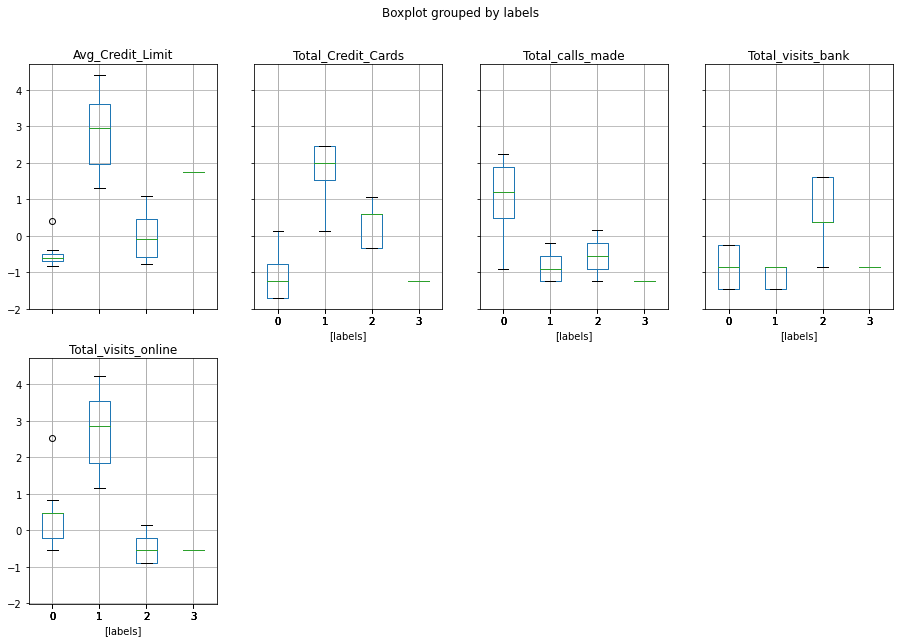

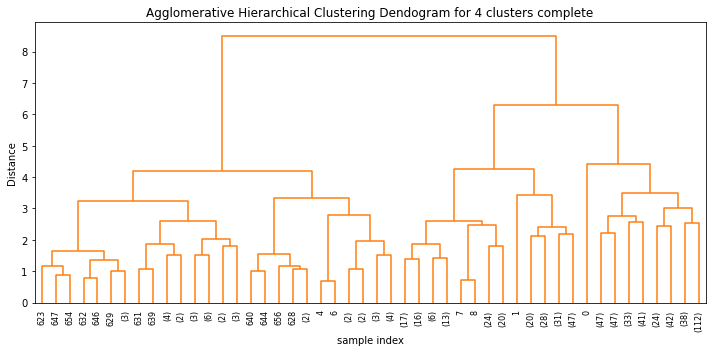

********* 4 clusters - Method: single
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           33851.948052            5.516883           3.493506   
1          141040.000000            8.740000           0.600000   
2           50000.000000            3.000000           0.000000   
3           11982.142857            2.419643           0.941964   

        Total_visits_online  Total_calls_made  
labels                                         
0                  0.979221          1.994805  
1                 10.900000          1.080000  
2                 10.000000          9.000000  
3                  3.517857          6.848214  
Method single c:0.8561943118595386 Silhouette score: 0.5845848677893011


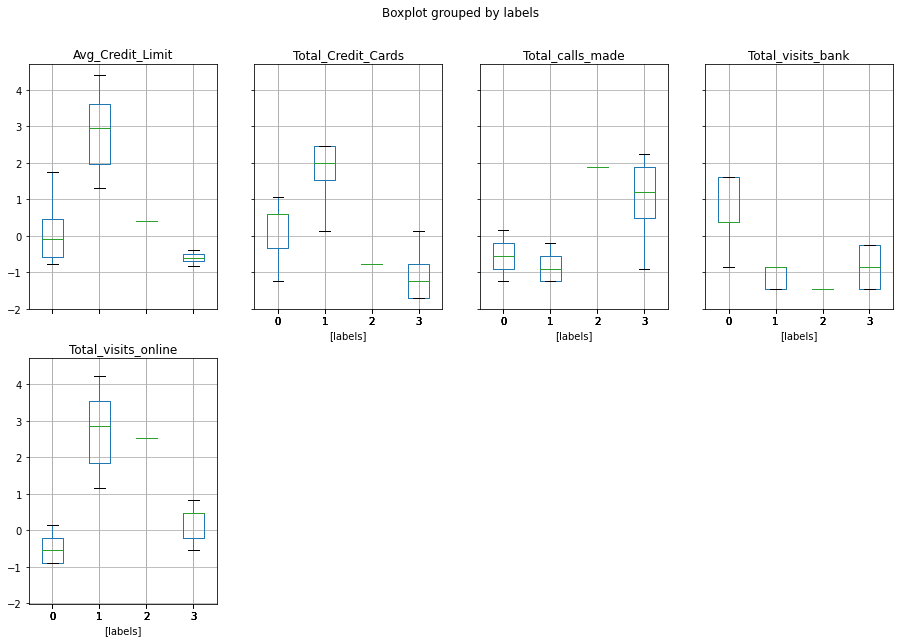

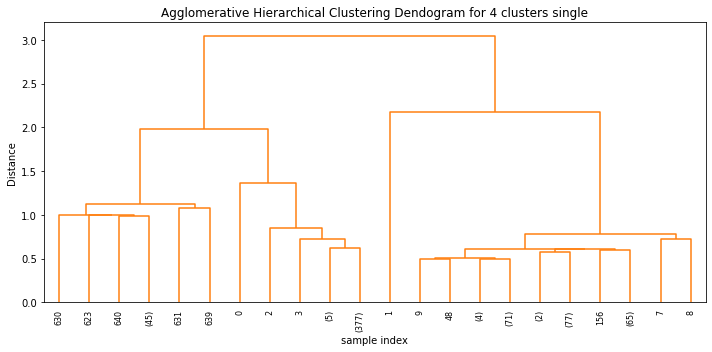

,cophenet_index,clustering,silhouette,method,clusters
0,NaN,knn,0.444806,na,2
1,NaN,knn,0.539779,na,3
2,0.761014,hierarchical,0.444190,ward,2
3,0.902041,hierarchical,0.577849,average,2
4,0.863706,hierarchical,0.577849,complete,2
5,0.749517,hierarchical,0.577849,single,2
6,0.773338,hierarchical,0.540316,ward,3
7,0.924637,hierarchical,0.590302,average,3
8,0.904851,hierarchical,0.589676,complete,3
9,0.811723,hierarchical,0.412644,single,3


In [167]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.metrics import silhouette_score

data_scaled.drop(columns="GROUP", inplace=True)
#results = pd.DataFrame(columns={'clustering', 'clusters', 'method', 'cophenet_index', 'silhouette'})
# methods = { 'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'}
methods = { "ward", "complete", "average", "single" }

for num_clusters in { 2, 3,4 }:
    for method in methods:
        print(f"********* {num_clusters} clusters - Method: {method}")
        model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean',  linkage=method)
        model.fit(data_scaled)
        relevant_data['labels'] = model.labels_

        data_clust = relevant_data.groupby(['labels'])
        print(data_clust.mean())
        data_scaled['labels'] = model.labels_

        data_scaled.boxplot(by='labels', layout = (2,4),figsize=(15,10))

        Z = linkage(data_scaled, metric='euclidean', method=method)
        c, coph_dists = cophenet(Z , pdist(data_scaled))
        sil = silhouette_score(data_scaled, data_scaled['labels'])
        print(f"Method {method} c:{c} Silhouette score: {sil}")
        
        results = results.append( { 'clustering': 'hierarchical', 'clusters': num_clusters, 'method': method, 'cophenet_index': c, 'silhouette': sil }, ignore_index=True)
        plt.figure(figsize=(10, 5))
        plt.title(f'Agglomerative Hierarchical Clustering Dendogram for {num_clusters} clusters {method}')
        plt.xlabel('sample index')
        plt.ylabel('Distance')
        dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8, truncate_mode='level', p=5 )
        plt.tight_layout()
        plt.show()

        # Calculate Avg Silhoutte Score



results

### Observations:
#### For 2 clusters:
#### All variables seem to not overlap. 
#### Total_calls_made does overlap the most in all methods except for ward, where it overlaps more but then
#### avg_credit_limit overlaps more, whereas in all other methods it does not.

#### The best cophenet index is for method average and 3 clusters.

#### Most dendrograms seem to indicate the best cut is at 3 clusters.

## Knn and Hierarchical comparison
#### Best silhouette for each method shows hierarchical performs better, which is expected
#### as it's costlier computationally.

#### Looking at the profiles of knn 3 clusters and the best hierarchical 3 clusters (average), the variables boxplot look very similar, i.e.
#### the clusters seem very similar

#### Looking at the profiles of knn 2 clusters and the best hierarchical 2 clusters (average), the variables boxplot do not look 
#### very similar. In hierarchical there seems to be less ovelap in boxplots than in knn.

## Conclusions:

#### The best silhouette index is at 3 clusters in hierarchical, but not too far apart from a 2 clusters set,
#### which is aligned with what we saw in the elbow comparison.

#### The best 3 clusters grouping shows(hierarchical, 3 clusters, average method):

#### Cluster 1: customers with not very high credit limit, not a lot of credit cards, some calls made, many visits
#### to the bank (potentially to request more credit, more credit cards?) and not a lot of visits online (not much credit/money
#### to operate, no resources to access online?).

#### Cluster 2: High credit limit customers, high number of credit cards, very few calls made (no need?),
#### very few visits made (no need?), most visits online (lots of operations with plenty money/credit?)

#### Cluster 3: least credit lmit, least credit cards, most calls made (requesting more credit limit, credit cards?), 
#### more visits to the bank than previous, average visits online (not a lot of credit/money to operate online?)

### Recommendations to bank:
#### To maximize profits
#### 1st tier (cluster 2): High credit, credit cards clients make very few calls and visits to the bank but have the highest number of 
#### online visits. To upsell and increase revenue, offer these customers more products and offerings online.
#### 2nd tier (cluster 1): These customers have the most physical visits to the bank, so identify them and try to
#### offer them upsell and offerings directly at the bank, through posters or direct interaction with bank personnel.
####  3rd tier (cluster 3): Most calls made to bank, which likely has a higher cost of bank personnel. Be better prepared to
#### service them better and faster on the phone and their physical visits. Prepare campaings for offering them
#### specific low limit credit cards.
